In [2]:

import numpy as np
from numpy.linalg import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:

def costFunction(x, t, weight):
    cost = 0
    # the formula is 1/2n sum from 1 to n (y(x,w)-y)squared
    for i in range(len(x)):
        error = weight[0]
        for j in range(1, len(x[0])):
            error += x[i][j] * weight[j]
        
        error = t[i] - error
        error = error ** 2
        cost += error
    cost = cost / len(x)
    cost /= 2
    return cost

In [4]:

#1/n sum from i to n the error for each x with all its weights -t*x
def caleDrivateve(x,t,weight):
    newWeights=np.zeros_like(weight)
    for i in range(len(weight)):
        theNewWeight=0
        for j in range(len(x)):
            error=weight[0]
            for k in range(1,len(x[0])):
                error+=x[j][k]*weight[k]

            error=error-t[j]
            theNewWeight+=error*x[j][i]

        theNewWeight/=len(x)
        newWeights[i]=theNewWeight

    return newWeights

In [5]:

def LinearRegressionGradientDescent(x,t,inital_start, step_size = 0.01, precision = 0.00001, max_iter = 1000):
    cur_start = np.array(initial_weights, dtype=float) 
    last_start = cur_start + 100 * precision    # something different
    # start_list = [cur_start]
    costs = []
    iter = 0
    while norm(cur_start - last_start) > precision and iter < max_iter:
        costs.append(costFunction(x,t,cur_start))
        print(cur_start)
        last_start = cur_start.copy()     # must copy

        gradient = caleDrivateve(x,t,cur_start)
        cur_start -= gradient * step_size   # move in opposite direction

        # start_list.append(cur_start)
        iter += 1

    return cur_start,costs

In [7]:

df=pd.read_csv("dataset_200x4_regression.csv")
t=df['Target']
X=df.drop(columns='Target')

scaler=MinMaxScaler()
model=linear_model.LinearRegression()

X_scaled=scaler.fit_transform(X)
features_scaled_with_bias = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))
weights=[0.24585146, 0.40585796, 0.16459143, 0.06130233]
# model.fit(features_scaled_with_bias,t)
# model_intersect,model_coef=model.intercept_,model.coef_

# pre_t=model.predict(features_scaled_with_bias)



# mse=mean_squared_error(pre_t,t)/2

# print(f"the mse={mse} and the intersiect is {model_intersect} and theoptima; weights are {model_coef} ")

# theResulte,costs=LinearRegressionGradientDescent(features_scaled_with_bias,t,initial_weights)
# print(res)

# theCost=costFunction(features_scaled_with_bias,t,weights)
# print(theCost)


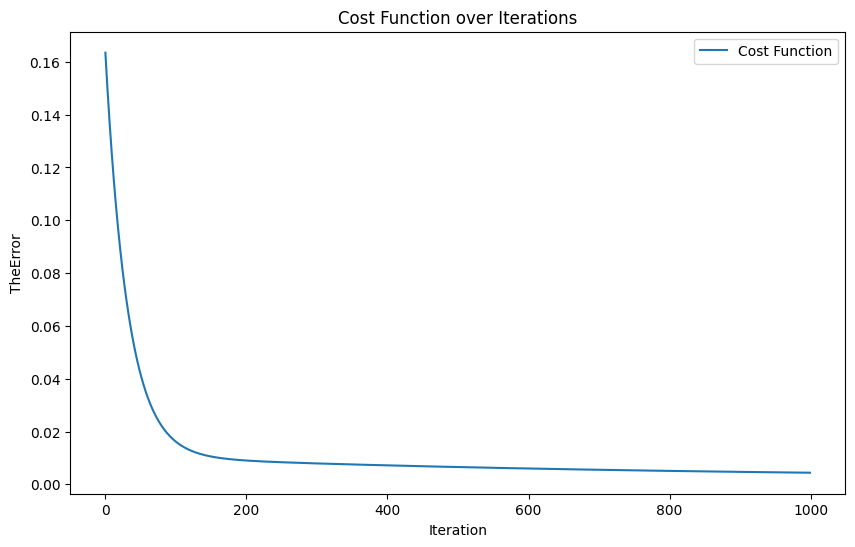

In [58]:

# Plotting the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(costs, label='Cost Function')
plt.xlabel('Iteration')
plt.ylabel('TheError')
plt.title('Cost Function over Iterations')
plt.legend()
plt.show()

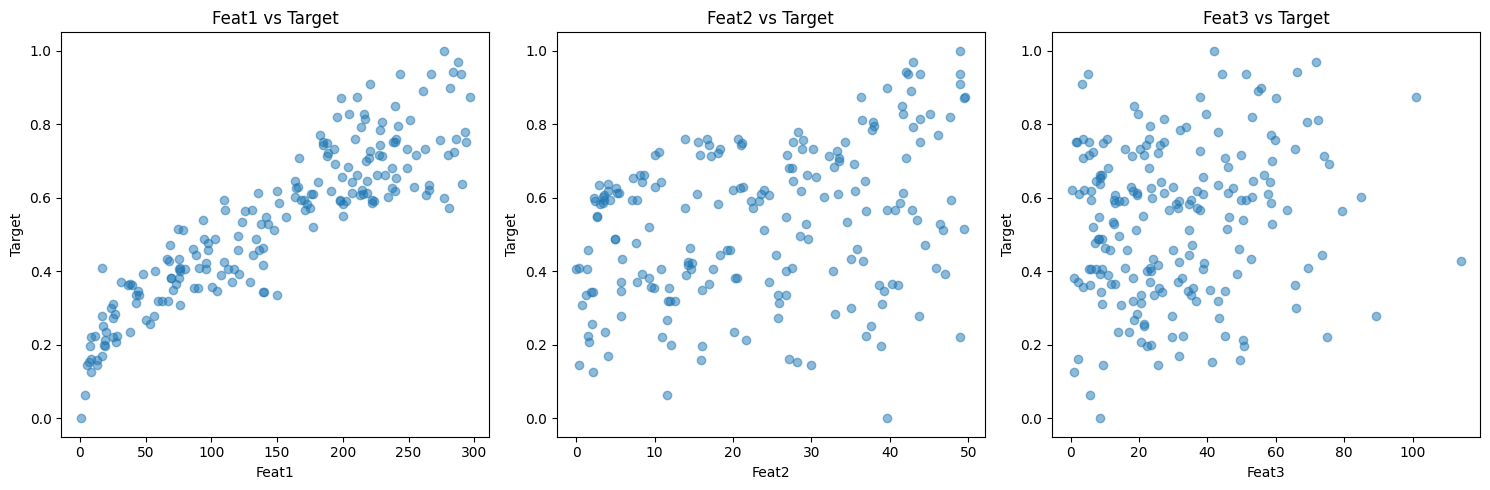

In [11]:


# Plot each feature versus the target
plt.figure(figsize=(15, 5))
scaled_df = pd.DataFrame(X_scaled, columns=df.columns[:-1])
for i, column in enumerate(scaled_df.columns):
    plt.subplot(1, len(scaled_df.columns), i + 1)
    plt.scatter(df[column], t, alpha=0.5)
    plt.title(f'{column} vs Target')
    plt.xlabel(column)
    plt.ylabel('Target')

plt.tight_layout()
plt.show()
